We import the needed libraries for our analysis as below:

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
#mpl.use("agg")
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn.tree 
#matplotlib.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

%matplotlib inline
my_dpi = 300

Importing the data:

In [3]:
full_data = pd.read_csv("DataFrame.csv")

We check the number of the missing values of the dataset:

In [4]:
missing_values_count = full_data.isnull().sum()
total_cells = np.product(full_data.shape)
total_missing = missing_values_count.sum()
missing_percent = total_missing / total_cells
print(missing_values_count)
print('missing_percent = ' + str(round(missing_percent,2)*100) + '%')

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64
missing_percent = 8.0%


We assess the number of the each animal type:

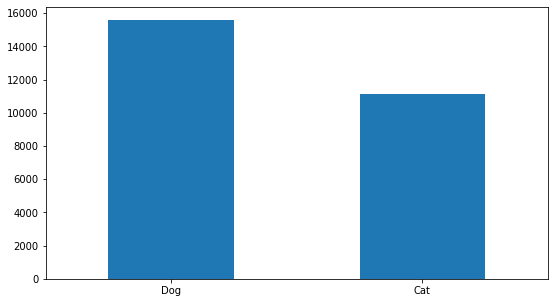

In [6]:
AnimalType = full_data["AnimalType"].value_counts()
plot1 = AnimalType.plot(kind='bar' , rot = 0,figsize=(9,5))
#plot1.figure.savefig(fname='figures/animal_type_num.png',dpi=my_dpi)

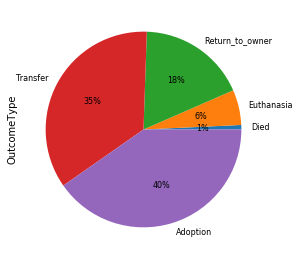

In [7]:
AnimalOutcome = full_data.OutcomeType.value_counts().sort_values()
plot2 = AnimalOutcome.plot(kind='pie',figsize=(4.5,4.5),fontsize=8, autopct='%.0f%%')
#plot2.figure.savefig(fname='figures/outcome_pie_plot.png',dpi=100)

We find the number of the distinct names of the animals.

In [8]:
print ('Number of unique names is: '+ str(len(full_data.Name.unique())))

Number of unique names is: 6375


We find the number of NA's in the dataset as below:

In [9]:
print('Number of names = ' + str(full_data.Name.count()))
print('Number of NA''s in names = ' + str(full_data.Name.isna().sum()))

Number of names = 19038
Number of NAs in names = 7691


In [10]:
#Adding column called HasName
idx_null =full_data['Name'].isnull();
# print(idx_null);

full_data.Name[idx_null]= 0
full_data.Name[~idx_null] = 1
full_data.rename(columns={'Name':'HasName'}, inplace=True)
print(full_data)

      AnimalID HasName             DateTime      OutcomeType OutcomeSubtype  \
0      A671945       1  2014-02-12 18:22:00  Return_to_owner            NaN   
1      A656520       1  2013-10-13 12:44:00       Euthanasia      Suffering   
2      A686464       1  2015-01-31 12:28:00         Adoption         Foster   
3      A683430       0  2014-07-11 19:09:00         Transfer        Partner   
4      A667013       0  2013-11-15 12:52:00         Transfer        Partner   
...        ...     ...                  ...              ...            ...   
26724  A702446       0  2015-05-14 11:56:00         Transfer        Partner   
26725  A718934       0  2016-01-20 18:59:00         Transfer           SCRP   
26726  A698128       1  2015-03-09 13:33:00         Adoption            NaN   
26727  A677478       0  2014-04-27 12:22:00         Transfer        Partner   
26728  A706629       0  2015-07-02 09:00:00         Transfer           SCRP   

      AnimalType SexuponOutcome AgeuponOutcome     

<bound method _AxesBase.set_autoscale_on of <matplotlib.axes._subplots.AxesSubplot object at 0x000001E1C8C50E88>>

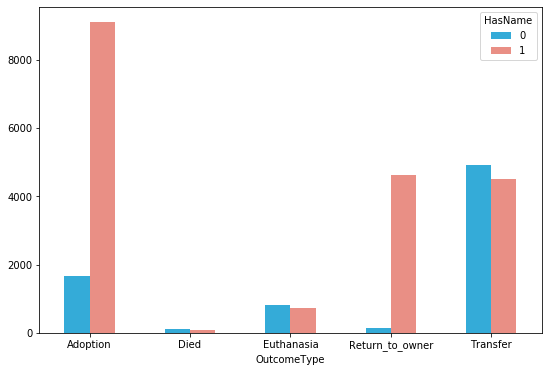

In [11]:
AnimalName = full_data[['HasName','OutcomeType']].groupby(['OutcomeType','HasName']).size().unstack()
plot3 = AnimalName.plot(kind='bar',color=['#34ABD8','#E98F85'],figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plot3.set_autoscale_on
#plot3.figure.savefig(fname='figures/outcome_hasname_plot.png',dpi=150)

In [12]:
#seperating Date and Time into other columns
full_data['Date'] = pd.to_datetime(full_data['DateTime']).dt.date
full_data['Time'] = pd.to_datetime(full_data['DateTime']).dt.time

In [13]:
#converting Date to Month and Weekday
full_data['Month'] = pd.DatetimeIndex(full_data['Date']).month
full_data['Weekday'] = pd.to_datetime(full_data['DateTime']).dt.dayofweek

full_data['Time'] = pd.to_datetime(full_data['DateTime'])
full_data['WorkHour']=full_data.Time.dt.hour

In [14]:
#Changing column work hour to 0 and 1
idx_workhour = pd.np.less(full_data['WorkHour'],16)
# print(idx_workhour);
full_data.WorkHour[idx_workhour]= 1
full_data.WorkHour[~idx_workhour] = 0
# print(full_data)

C:\Users\zibak\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\zibak\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zibak\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


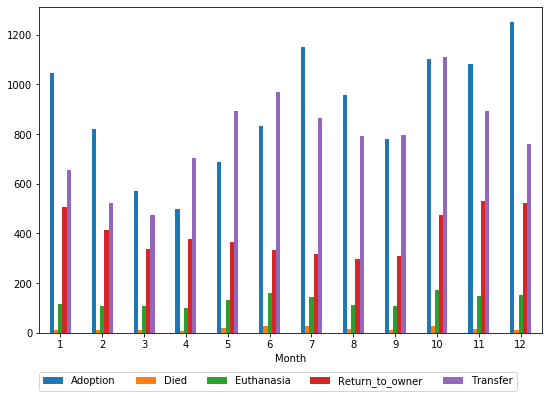

In [16]:
AnimalMonth = full_data[['Month','OutcomeType']].groupby(['Month','OutcomeType']).size().unstack()
plot4 = AnimalMonth.plot(kind='bar',figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
plot4.legend(bbox_to_anchor=(0.95, -0.12), loc=1, borderaxespad=0.,ncol=5)
#plot4.figure.savefig(fname='figures/outcome_month_plot.png',dpi=my_dpi)

[None, None, None, None, None, None, None, None, None, None]

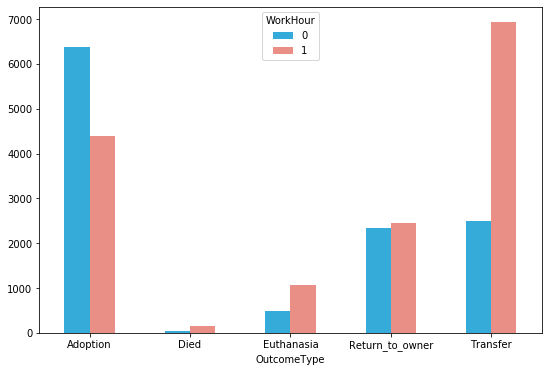

In [17]:
AnimalWork = full_data[['WorkHour','OutcomeType']].groupby(['OutcomeType','WorkHour']).size().unstack()
plot5 = AnimalWork.plot(kind='bar',color=['#34ABD8','#E98F85'],figsize=(9,6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
#plot5.figure.savefig(fname='figures/animal_work.png',dpi=my_dpi)

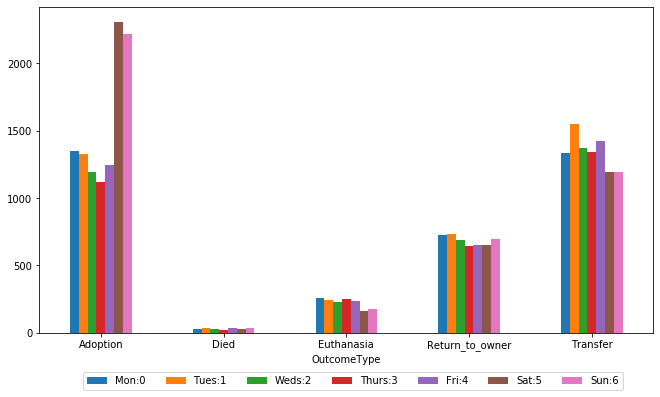

In [18]:
AnimalWork = full_data[['Weekday','OutcomeType']].groupby(['OutcomeType','Weekday']).size().unstack()
plot6 = AnimalWork.plot(kind='bar',figsize=(11,6))
locs, labels = plt.xticks()
days = ('Mon:0','Tues:1','Weds:2','Thurs:3','Fri:4','Sat:5','Sun:6')
plt.setp(labels, rotation=0)
plot6.legend(bbox_to_anchor=(0.95, -0.12), loc=1, borderaxespad=0.,ncol=7,labels =days)
#plot6.figure.savefig(fname='figures/animal_weekdays.png',dpi=my_dpi)

In [19]:
#extracting Intact column from SexuponOutcome:
full_data.iloc[3174,6] = 'Unknown'
full_data['Intact']=0

for i in range(26729):
    if 'Intact' in full_data.iloc[i,6]:
        full_data.iloc[i,15] = 1
    elif 'Unknown' in full_data.iloc[i,6] :
        full_data.iloc[i,15] = 'Unknown'
    else:
        full_data.iloc[i,15] = 0


In [20]:
#extracting Sex column from SexuponOutcome:
full_data['Sex']=0
for i in range(26729):
    if 'Male' in full_data.iloc[i,6]:
        full_data.iloc[i,16] = 'Male'
    elif 'Unknown' in full_data.iloc[i,6] :
        full_data.iloc[i,16] = 'Unknown'
    elif 'Female' in full_data.iloc[i,6]:
        full_data.iloc[i,16] = 'Female'

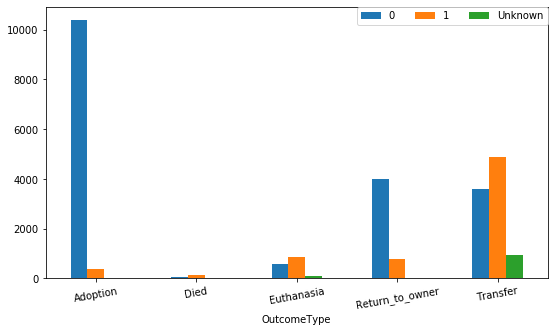

In [21]:
AnimalIntact = full_data[['Intact','OutcomeType']].groupby(['OutcomeType','Intact']).size().unstack()
plot7 = AnimalIntact.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot7.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
#plot7.figure.savefig(fname='figures/AnimalIntact.png',dpi=my_dpi)

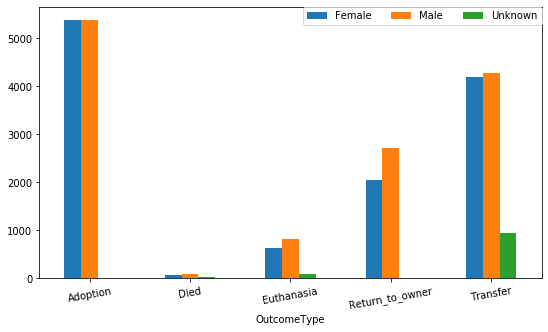

In [22]:
AnimalSex = full_data[['Sex','OutcomeType']].groupby(['OutcomeType','Sex']).size().unstack()
plot8 = AnimalSex.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot8.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
#plot8.figure.savefig(fname='figures/AnimalSex.png',dpi=my_dpi)

In [23]:
def ext_nbr(input_str):
    out_number = ''
    for x in input_str:
        if x.isdigit():
            out_number += x
    return int(out_number)

In [24]:
full_data['Age_Day']=0
for i in range(26729):
    if pd.isna(full_data.iloc[i,7]):
        continue
    else:  
        num = ext_nbr(full_data.iloc[i,7])
        if 'week' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num * 7
        elif 'month' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num *30
        elif 'year' in full_data.iloc[i,7]:
            full_data.iloc[i,17] = num *365

In [25]:
full_data['Age_Day'].fillna(full_data['Age_Day'].mean())

0         365
1         365
2         730
3          21
4         730
         ... 
26724      30
26725      90
26726    1460
26727      28
26728     365
Name: Age_Day, Length: 26729, dtype: int64

In [26]:
full_data['LifeSpan'] = 0
for i in range(len(full_data)):
    if full_data.iloc[i,5] == 'Dog':
        if full_data.iloc[i,17] < 350:
            full_data.iloc[i,18] = 1 #infant
        elif full_data.iloc[i,17] < 2600:
            full_data.iloc[i,18] = 2 #adult
        else:
            full_data.iloc[i,18] = 3 #old
    else:
        if full_data.iloc[i,17] < 350:
            full_data.iloc[i,18] = 1 #infant
        elif full_data.iloc[i,17] < 3600:
            full_data.iloc[i,18] = 2 #adult
        else:
            full_data.iloc[i,18] = 3 #old
        

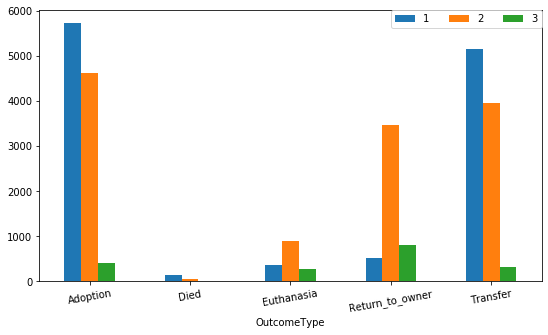

In [28]:
Animalspan = full_data[['LifeSpan','OutcomeType']].groupby(['OutcomeType','LifeSpan']).size().unstack()
plot9 = Animalspan.plot(kind='bar',figsize = (9,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=10)
plot9.legend(bbox_to_anchor=(1, 1.0), loc=0, borderaxespad=0.,ncol=3)
#plot9.figure.savefig(fname='figures/Animalspan.png',dpi=my_dpi)

In [29]:
#deletes '/' and Mix from Breed
def ext_str(in_str):
    x=''
    if 'Mix' in in_str:
        out_str = in_str.replace("Mix", "")
    elif '/' in in_str:
        out_str = ''
        for x in in_str:
            if x=='/':
                break
            else:
                out_str += x
    else:
        out_str = in_str
    return (out_str)

In [30]:
full_data['Breed_simplified']=''
for i in range(len(full_data)):
    full_data.iloc[i,19] = ext_str(full_data.iloc[i,8])


In [31]:
full_data['Color_simplified']=''
for i in range(len(full_data)):
    full_data.iloc[i,20] = ext_str(full_data.iloc[i,9])

In [32]:
#converting categorial feature to numerical
full_data["AnimalType"] = full_data["AnimalType"].astype('category')
full_data["AnimalType"] = full_data["AnimalType"].cat.codes

full_data["Sex"] = full_data["Sex"].astype('category')
full_data["Sex"] = full_data["Sex"].cat.codes

full_data["Breed_simplified"] = full_data["Breed_simplified"].astype('category')
full_data["Breed_simplified"] = full_data["Breed_simplified"].cat.codes

full_data["Color_simplified"] = full_data["Color_simplified"].astype('category')
full_data["Color_simplified"] = full_data["Color_simplified"].cat.codes

full_data["Intact"] = full_data["Intact"].astype('category')
full_data["Intact"] = full_data["Intact"].cat.codes

full_data["OutcomeType"] = full_data["OutcomeType"].astype('category')
full_data["OutcomeType"] = full_data["OutcomeType"].cat.codes

In [36]:
X = full_data.loc[ :,['HasName','AnimalType','Month','Weekday','WorkHour','Intact','Sex','LifeSpan','Breed_simplified','Color_simplified']]
y = full_data['OutcomeType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
#       ********* Random Forest ********
RF_Model = RandomForestRegressor(n_estimators = 100)#, random_state = 42)
RF_Model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
# computing feature importance
importances = RF_Model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 5 (0.264468)
2. feature 8 (0.172248)
3. feature 2 (0.141741)
4. feature 9 (0.128721)
5. feature 3 (0.098980)
6. feature 7 (0.087288)
7. feature 6 (0.035190)
8. feature 4 (0.027738)
9. feature 0 (0.026722)
10. feature 1 (0.016903)


(-1, 10)

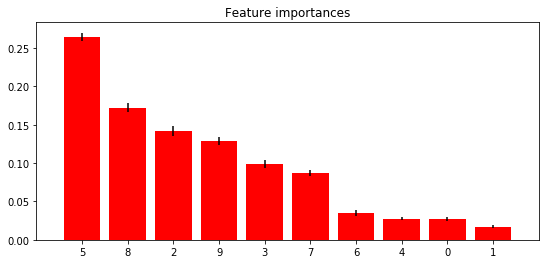

In [40]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(9,4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
#plt.savefig(fname='figures/feature_importance.png',dpi=my_dpi)

In [41]:
# Use the Model to predict the test data
pred_RF = RF_Model.predict(X_test)

# Calculate the absolute errors
errors_RF = abs(pred_RF - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_RF), 2), 'degrees.')

Mean Absolute Error: 1.13 degrees.


In [42]:
#         ******** SVM ********
SVM_Model = svm.SVC()
SVM_Model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# Use the Model to predict the test data
pred_SVM = SVM_Model.predict(X_test)

# Calculate the absolute errors
errors_SVM = abs(pred_SVM - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_SVM), 2), 'degrees.')

#Calculate Accuracy
Acc_SVM = accuracy_score(pred_SVM,y_test)

#Print out Accuracy
print('Accuracy           :', round(Acc_SVM,3))

Mean Absolute Error: 1.58 degrees.
Accuracy           : 0.519


In [44]:
#  *********** ADABOOST *********
ADA_Model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model = ADA_Model.fit(X, y)

In [46]:
# Use the Model to predict the test data
pred_ADA = ADA_Model.predict(X_test)

# Calculate the absolute errors
errors_ADA = abs(pred_ADA - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_ADA), 2), 'degrees.')

#Calculate Accuracy
Acc_ADA = accuracy_score(pred_ADA,y_test)

#Print out Accuracy
print('Accuracy           :', round(Acc_ADA , 3))

Mean Absolute Error: 1.03 degrees.
Accuracy           : 0.625


In [47]:
#    ************* Decision Tree ************
DT_Model=DecisionTreeClassifier()
DT_Model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
# Use the Model to predict the test data
pred_DT = DT_Model.predict(X_test)

# Calculate the absolute errors
errors_DT = abs(pred_DT - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_DT), 2), 'degrees.')

#Calculating Accuracy
Acc_DT = accuracy_score(pred_DT,y_test)

#Printing out Accuracy
print('Accuracy           :', round(Acc_DT, 3))

Mean Absolute Error: 0.12 degrees.
Accuracy           : 0.957
